# Data Science Intern at LetsGrowMore


# Author:Madhuri Prasad¶

# TASK-03 Prediction Using Decision Tree Algorithm

# Dataset link:https://bit.ly/3kXTdox

# Importing the necessary package

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection  import train_test_split
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics  import accuracy_score,classification_report,confusion_matrix
%matplotlib inline


      Importing the data                 

In [16]:
data=pd.read_csv("iris data.csv")
print("imported successfully")


imported successfully


In [17]:
data.head()  # used for getting the  top 5 values

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploring the Data and analysing

In [18]:
data.shape     #Returns size of dataframe/series which is equivalent to total number of elements like (rows,columns).

(150, 6)

In [19]:
data.info()  # The info() function here is used to display a concise summary of the  DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
data.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [21]:
data.describe()   #It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

      three classes have been equally distributed

In [23]:
# creating the dataframe for each species
setosa=data[data['Species']== 'Iris-setosa']
versicolor=data[data['Species']== 'Iris-versicolor']
virginica=data[data['Species']== 'Iris-virginica']

In [26]:
print("Setosa:\n :",setosa.describe())
print("\nversicolor:\n :",versicolor.describe())
print("\n virginica:\n :",virginica.describe())

Setosa:
 :              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

versicolor:
 :               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min    

In [27]:
data.isnull().sum()  # concluding that none of the data is null.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Visualization

# 1.Scatter plot

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

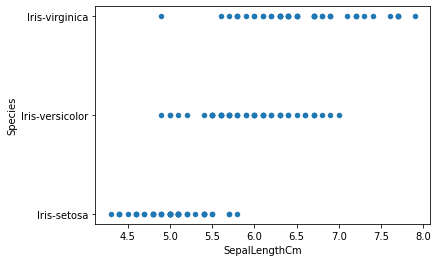

In [31]:
data.plot(kind="scatter",x='SepalLengthCm',y='Species')

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

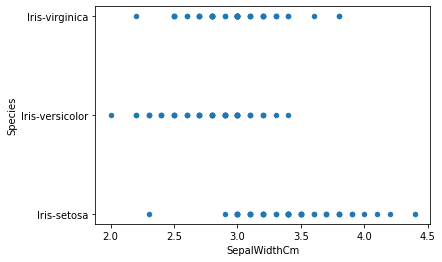

In [32]:
data.plot(kind="scatter",x='SepalWidthCm',y='Species')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

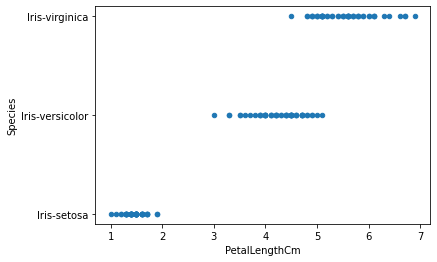

In [34]:
data.plot(kind="scatter",x='PetalLengthCm',y='Species')

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

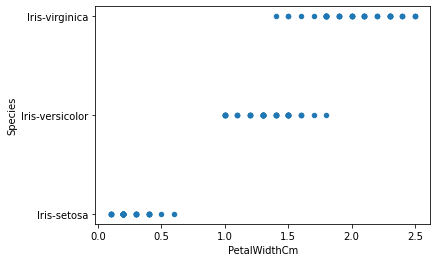

In [35]:
data.plot(kind="scatter",x='PetalWidthCm',y='Species')

# 2.Box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1f41aa14910>,
 'caps': [<matplotlib.lines.Line2D at 0x1f41aa14f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f41aa144c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f41aa1e6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f41aa1ea60>],
 'means': []}

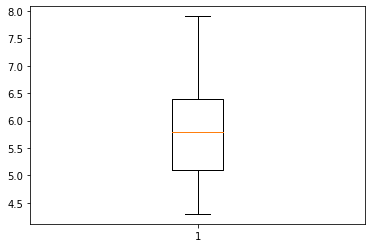

In [36]:
plt.boxplot(data["SepalLengthCm"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f41aa80b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1f41aa8c220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f41aa807c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f41aa8c9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f41aa8cd60>],
 'means': []}

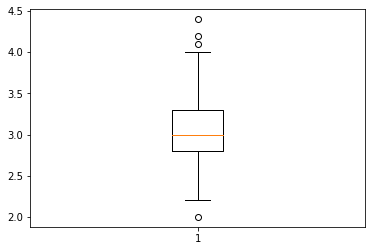

In [38]:
plt.boxplot(data["SepalWidthCm"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f41aaed550>,
 'caps': [<matplotlib.lines.Line2D at 0x1f41aaedc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f41aaed1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f41aaf73d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f41aaf7760>],
 'means': []}

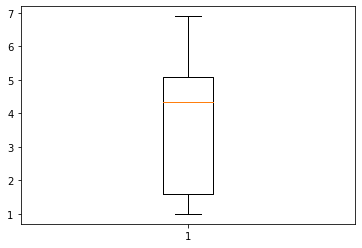

In [39]:
plt.boxplot(data["PetalLengthCm"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f41ab53550>,
 'caps': [<matplotlib.lines.Line2D at 0x1f41ab53c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f41ab53220>],
 'medians': [<matplotlib.lines.Line2D at 0x1f41ab603d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f41ab60760>],
 'means': []}

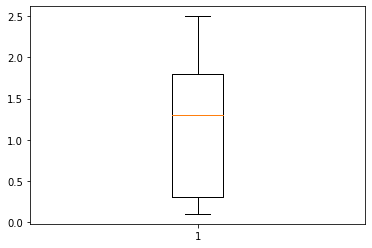

In [40]:
plt.boxplot(data["PetalWidthCm"])

# 3.Histogram

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

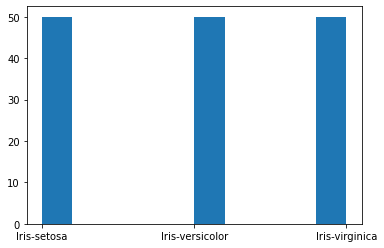

In [45]:
plt.hist(data["Species"])

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

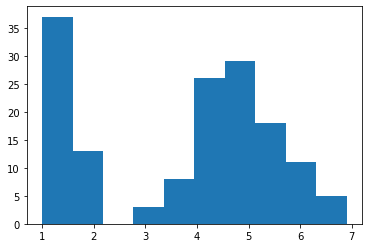

In [46]:
plt.hist(data["PetalLengthCm"])

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

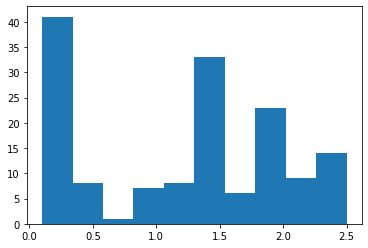

In [47]:
plt.hist(data["PetalWidthCm"])

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

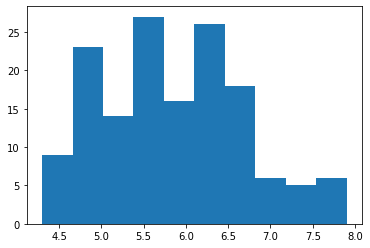

In [49]:
plt.hist(data["SepalLengthCm"])

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

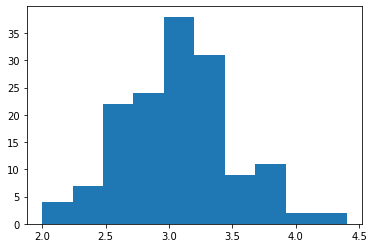

In [48]:
plt.hist(data["SepalWidthCm"])

# 4..Pair plot

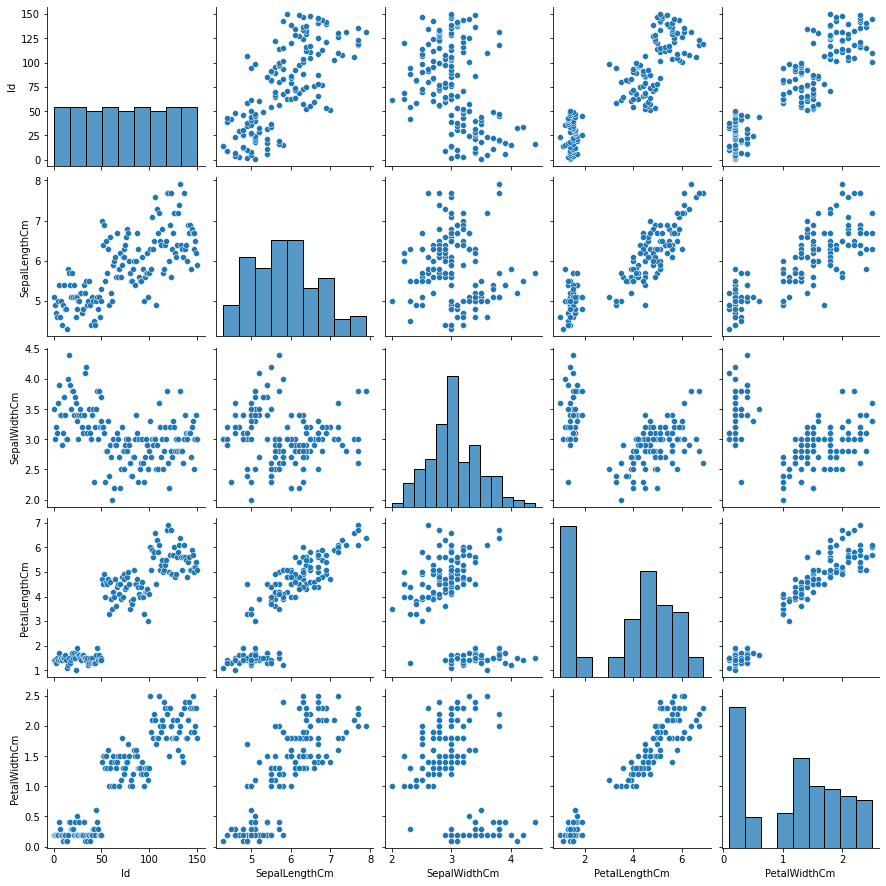

In [42]:
sns.pairplot(data)

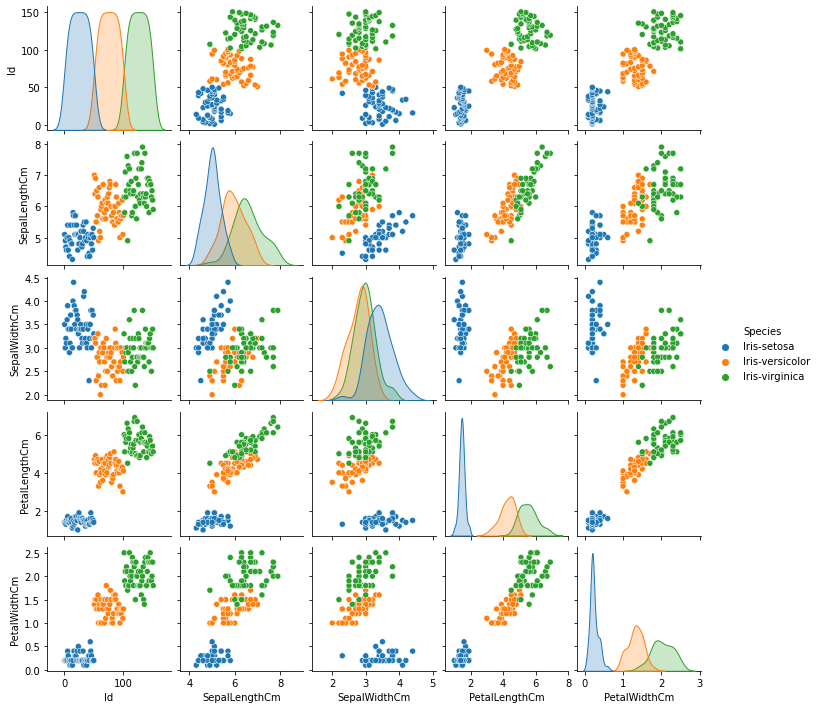

In [44]:
sns.pairplot(data,hue="Species" ,height=2)

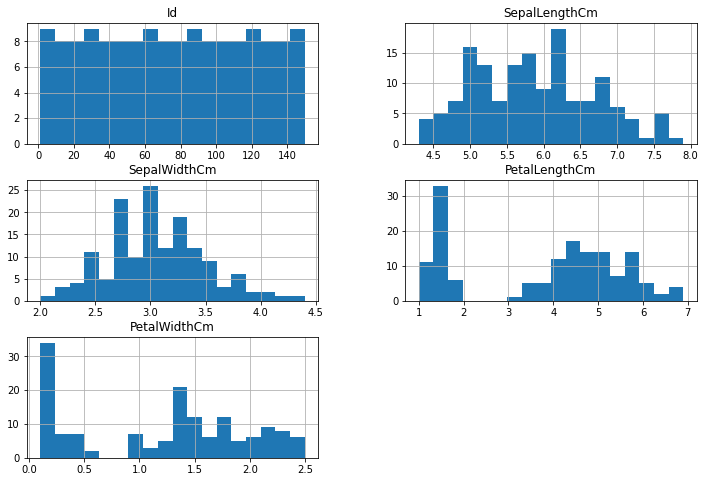

In [51]:
# checking and displaying the distribution of all the features
data.hist(figsize=(12,8),bins=18)
plt.title("Feature Distribution")
plt.show()

In [50]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


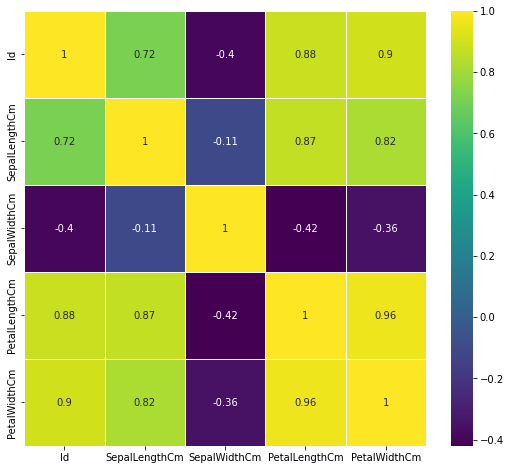

In [52]:
plt.figure(figsize=(9,8))
sns.heatmap(data.corr(),annot=True,cmap="viridis",linewidth=0.5)
plt.show()

# Predicting and Training the model

In [58]:
X_all=data.iloc[:,5]
Y_all=data.iloc[:,5]
print(X_all)              

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [65]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.model_selection  import train_test_split,cross_val_score
X=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

# Splitting the Data

In [86]:
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify=y, random_state=0,test_size=0.36)

In [87]:
# Defining the  Decision Tree  Algorithm
from sklearn.tree  import DecisionTreeClassifier
decisiontree= DecisionTreeClassifier()
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
# accuracy and testing the model
from sklearn.metrics  import accuracy_score
y_pred=decisiontree.predict( X_test)
print(" the Model accuracy score is : ",accuracy_score( y_test,y_pred)*100,"%")


 the Model accuracy score is :  96.29629629629629 %


In [89]:
from sklearn.tree  import DecisionTreeClassifier
decisiontree= DecisionTreeClassifier()
decisiontree.fit(X,y)

DecisionTreeClassifier()

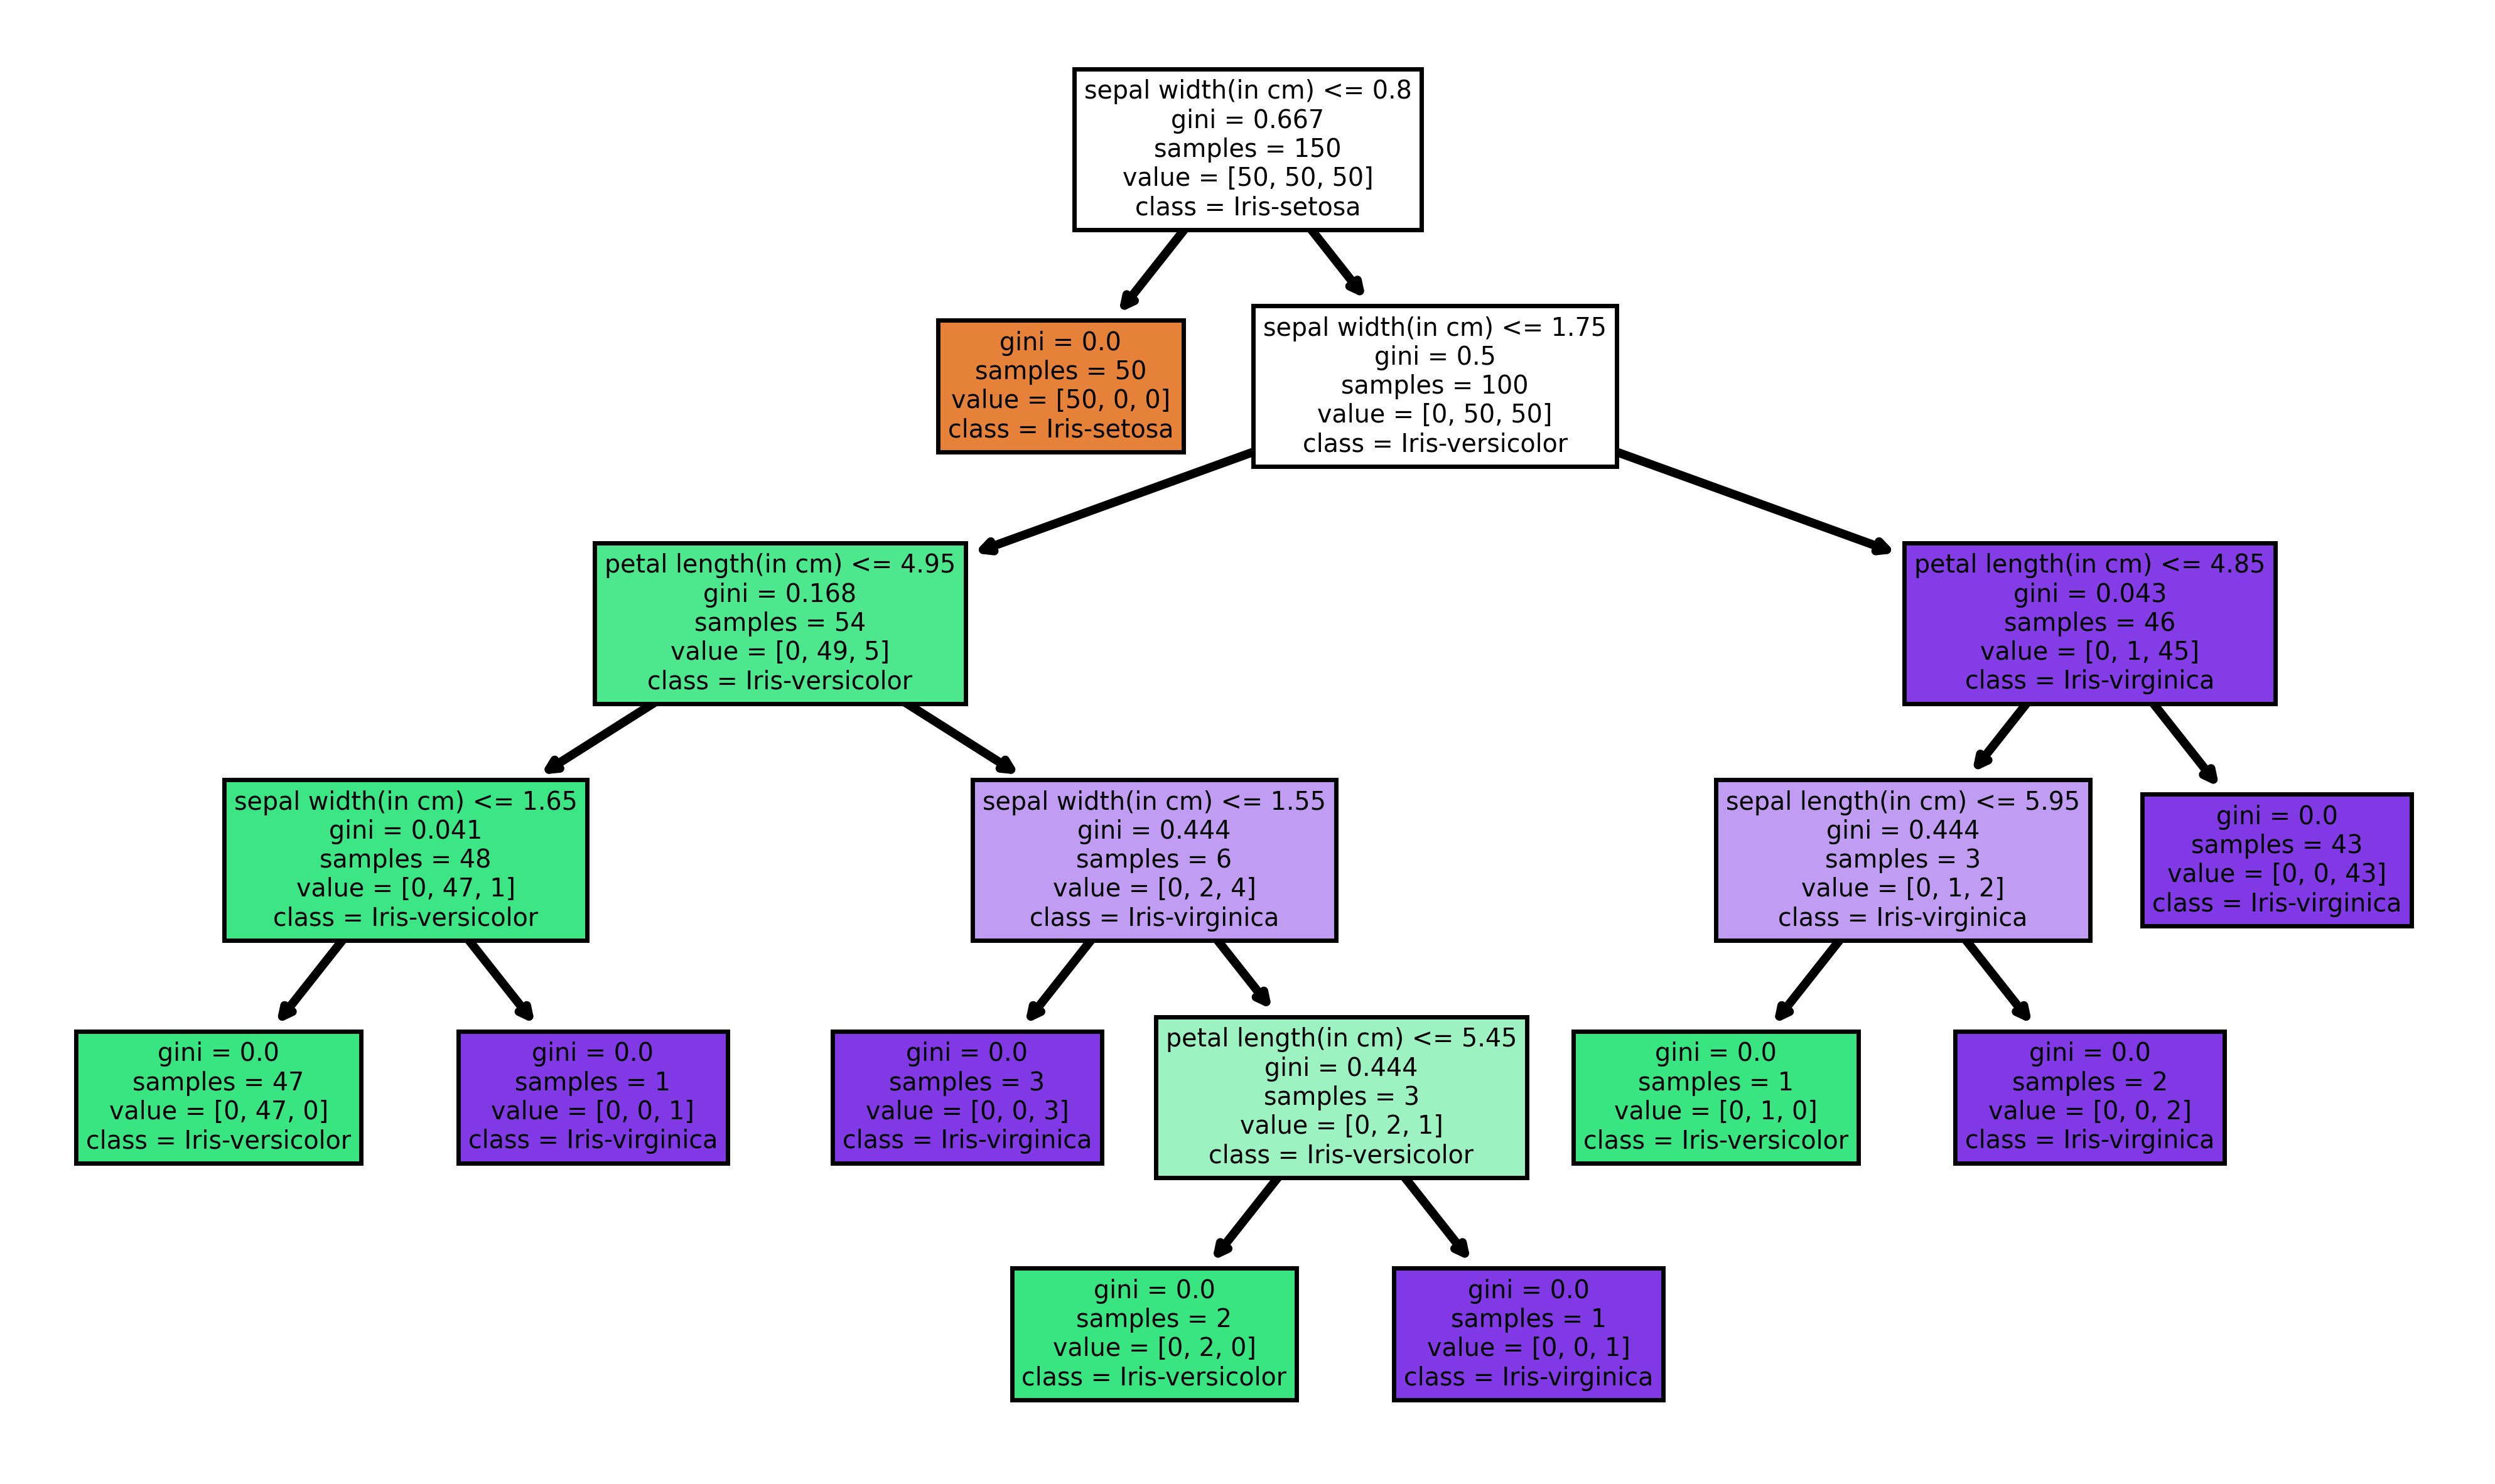

In [95]:
from sklearn.tree import plot_tree
featName=['sepal length(in cm)','sepal width (in cm)','petal length(in cm)','sepal width(in cm)']
clsName=['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,6),dpi=500)
out=plot_tree(decisiontree, feature_names =featName,class_names=clsName,filled=True);
for o in out:
    arrow=o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)
        
fig.savefig('image.png')        